In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='ticks', font_scale=1.5)
mpl.rcParams["text.usetex"] = True
mpl.rcParams["mathtext.fontset"] = 'cm'
mpl.rcParams['font.family'] = ['sans-serif']

In [2]:
log_baseline = pd.read_csv('../outputs/log_baseline.csv')
log_cvx = pd.read_csv('../outputs/log_cvx.csv')
log_cvx_truc5 = pd.read_csv('../outputs/log_cvx_truc5.csv')
log_direct = pd.read_csv('../outputs/log_direct.csv')
log_mc = pd.read_csv('../outputs/log_mc.csv')

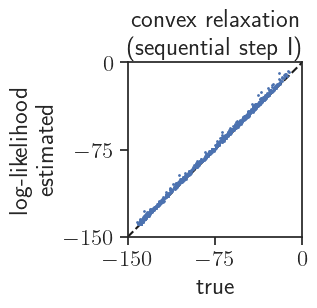

In [3]:
fig, axs = plt.subplots(1, 1, figsize=(3.5, 3.5))

axs.plot(log_baseline['ll'], log_cvx['s1_ll'], linestyle='none', marker='.', markersize=2)

axs.set_aspect('equal', 'box')
axs.plot((-150, 0), (-150, 0), color='k', linestyle='dashed', zorder=-1)
axs.set_xlim(-150, 0)
axs.set_ylim(-150, 0)
axs.set_xticks(np.arange(-150, 1, 75))
axs.set_yticks(np.arange(-150, 1, 75))
axs.set_xticklabels([f'${l}$' for l in np.arange(-150, 1, 75)])
axs.set_yticklabels([f'${l}$' for l in np.arange(-150, 1, 75)])
axs.set_xlabel('true')
axs.set_ylabel('log-likelihood\nestimated')

axs.set_title('convex relaxation\n(sequential step I)')

plt.tight_layout()
fig.savefig('../figures/ll_step1.pdf', bbox_inches='tight')

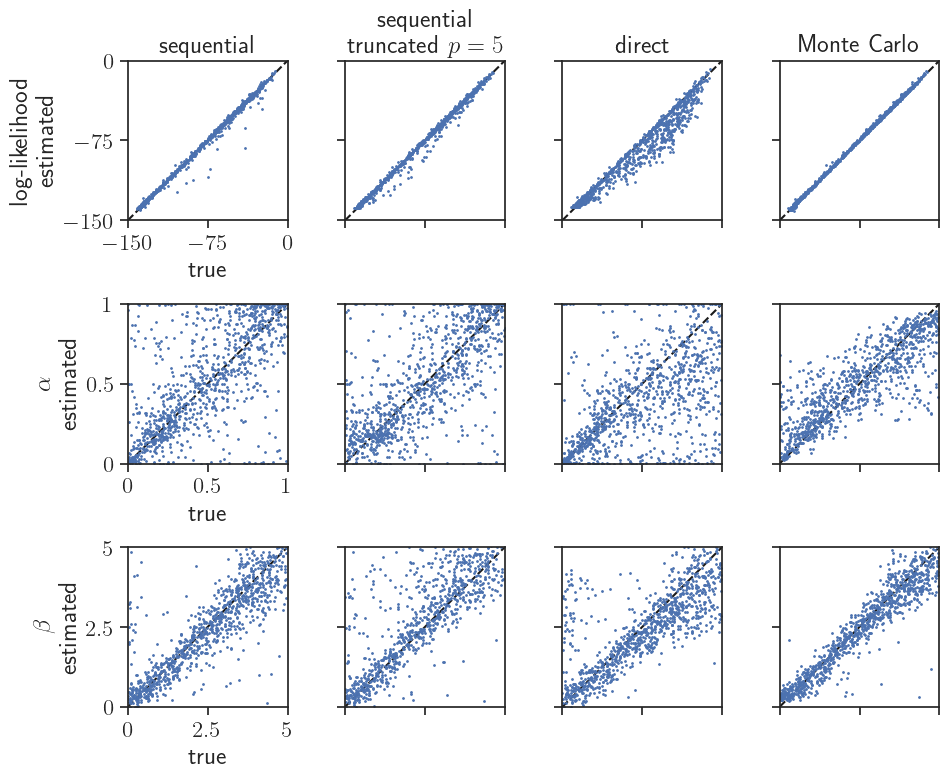

In [4]:
fig, axs = plt.subplots(3, 4, figsize=(10, 8))

axs[0, 0].plot(log_baseline['ll'], log_cvx['ll'], linestyle='none', marker='.', markersize=2)
axs[0, 1].plot(log_baseline['ll'], log_cvx_truc5['ll'], linestyle='none', marker='.', markersize=2)
axs[0, 2].plot(log_baseline['ll'], log_direct['ll'], linestyle='none', marker='.', markersize=2)
axs[0, 3].plot(log_baseline['ll'], log_mc['ll'], linestyle='none', marker='.', markersize=2)

axs[1, 0].plot(log_cvx['alpha'], log_cvx['alpha_hat'], linestyle='none', marker='.', markersize=2)
axs[1, 1].plot(log_cvx_truc5['alpha'], log_cvx_truc5['alpha_hat'], linestyle='none', marker='.', markersize=2)
axs[1, 2].plot(log_direct['alpha'], log_direct['alpha_hat'], linestyle='none', marker='.', markersize=2)
axs[1, 3].plot(log_mc['alpha'], log_mc['alpha_hat'], linestyle='none', marker='.', markersize=2)

axs[2, 0].plot(log_cvx['beta'], log_cvx['beta_hat'], linestyle='none', marker='.', markersize=2)
axs[2, 1].plot(log_cvx_truc5['beta'], log_cvx_truc5['beta_hat'], linestyle='none', marker='.', markersize=2)
axs[2, 2].plot(log_direct['beta'], log_direct['beta_hat'], linestyle='none', marker='.', markersize=2)
axs[2, 3].plot(log_mc['beta'], log_mc['beta_hat'], linestyle='none', marker='.', markersize=2)

for r_idx in range(axs.shape[0]):
    for c_idx in range(axs.shape[-1]):
        axs[r_idx, c_idx].set_aspect('equal', 'box')

for ax in axs[0]:
    ax.set_aspect('equal', 'box')
    ax.plot((-150, 0), (-150, 0), color='k', linestyle='dashed', zorder=-1)
    ax.set_xlim(-150, 0)
    ax.set_ylim(-150, 0)
    ax.set_xticks(np.arange(-150, 1, 75))
    ax.set_yticks(np.arange(-150, 1, 75))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
axs[0, 0].set_xticklabels([f'${l}$' for l in np.arange(-150, 1, 75)])
axs[0, 0].set_yticklabels([f'${l}$' for l in np.arange(-150, 1, 75)])
axs[0, 0].set_xlabel('true')
axs[0, 0].set_ylabel('log-likelihood\nestimated')

for ax in axs[1]:
    ax.plot((0, 1), (0, 1), color='k', linestyle='dashed', zorder=-1)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
axs[1, 0].set_xticklabels([f'${l}$' for l in[0, 0.5, 1]])
axs[1, 0].set_yticklabels([f'${l}$' for l in[0, 0.5, 1]])

for ax in axs[2]:
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_xticks([0, 2.5, 5])
    ax.set_yticks([0, 2.5, 5])
    ax.plot((0, 5), (0, 5), color='k', linestyle='dashed', zorder=-1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
axs[2, 0].set_xticklabels([f'${l}$' for l in[0, 2.5, 5]])
axs[2, 0].set_yticklabels([f'${l}$' for l in[0, 2.5, 5]])

axs[1, 0].set_xlabel('true')
axs[1, 0].set_ylabel(r'$\alpha$'+'\nestimated')
axs[2, 0].set_xlabel('true')
axs[2, 0].set_ylabel(r'$\beta$'+'\nestimated')

axs[0, 0].set_title('sequential')
axs[0, 1].set_title('sequential\ntruncated $p = 5$')
axs[0, 2].set_title('direct')
axs[0, 3].set_title('Monte Carlo')

plt.tight_layout()
fig.savefig('../figures/exp1.pdf', bbox_inches='tight')

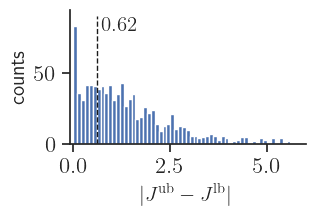

In [5]:
bd_gaps = np.abs(log_cvx['s1_ll'] - log_cvx['ll'])
tight_thr = bd_gaps[np.where(log_cvx['tight'] == 1)[0]].max()

fig, axs = plt.subplots(1, 1, figsize=(3.5, 2.5))

counts, bins, _ = axs.hist(bd_gaps, bins=100, range=(0, 10), width=0.1)
axs.vlines(tight_thr, 0, 90, 
           linestyle='dashed', color='k', linewidth=1)

axs.text(tight_thr + 0.1, 80, f"${np.round(tight_thr, 2)}$",
        fontsize=15)

axs.set_xlabel(r"$|J^{\rm ub} - J^{\rm lb}|$", fontsize=15)
axs.set_ylabel("counts", fontsize=15)

axs.set_xlim(-0.1, 6)

sns.despine()
plt.tight_layout()
fig.savefig('../figures/exp1_bd_gap.pdf', bbox_inches='tight')

In [6]:
cvx_s1_ts = log_cvx['s1_time'] * 1000
cvx_s2_ts = log_cvx['s2_time'] * 1000
cvx_truc5_s1_ts = log_cvx_truc5['s1_time'] * 1000
cvx_truc5_s2_ts = log_cvx_truc5['s2_time'] * 1000
direct_ts = log_direct['time'] * 1000
mc_ts = log_mc['time'] * 1000

print(f"sequential s1: {int(np.mean(cvx_s1_ts))} pm {int(np.std(cvx_s1_ts) / np.sqrt(len(cvx_s1_ts)))}")
print(f"sequential s2: {int(np.mean(cvx_s2_ts))} pm {int(np.std(cvx_s2_ts) / np.sqrt(len(cvx_s2_ts)))}")
print(f"sequential truncated s1: {int(np.mean(cvx_truc5_s1_ts))} pm {int(np.std(cvx_truc5_s1_ts) / np.sqrt(len(cvx_truc5_s1_ts)))}")
print(f"sequential truncated s2: {int(np.mean(cvx_truc5_s2_ts))} pm {int(np.std(cvx_truc5_s2_ts) / np.sqrt(len(cvx_truc5_s2_ts)))}")
print(f"direct: {int(np.mean(direct_ts))} pm {int(np.std(direct_ts) / np.sqrt(len(direct_ts)))}")
print(f"monte carlo: {int(np.mean(mc_ts))} pm {int(np.std(mc_ts) / np.sqrt(len(mc_ts)))}")

sequential s1: 54 pm 0
sequential s2: 249 pm 6
sequential truncated s1: 4 pm 0
sequential truncated s2: 59 pm 1
direct: 575 pm 24
monte carlo: 2386 pm 34
